In [ ]:
# hej 


# Import  

In [2]:
# Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sklearn 
import os 
import IPython.display as ipd
from scipy import signal
import scipy.io.wavfile as wavfile





In [3]:
# Import data 
ravdessPath = "./ravdess_data/audio_speech_actors_01-24/"
ravdessFiles = os.listdir(ravdessPath)
print(ravdessFiles)


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [4]:
# Create data frame
ravdess_dataframe = pd.DataFrame(columns=['path','actor', 'gender', 'emotion','emotion_label'])
count = 0

# Loop through every actor
for actor in ravdessFiles:
    actorAudioFiles = os.listdir(ravdessPath + actor)
    # Loop trough every audio file for the actor
    for audioFile in actorAudioFiles:
        nm = audioFile.split('.')[0].split('-')
        path = ravdessPath + actor + '/' + audioFile
        src = int(nm[1])
        actorNum = int(nm[-1])
        emotion = int(nm[2])

        # get actors gender
        if int(actorNum)%2 == 0:
            gender = "female"
        else:
            gender = "male"

        # Get emotion in audio file
        if emotion == 1:
            lb = "neutral"
        elif emotion == 2:
            lb = "calm"
        elif emotion == 3:
            lb = "happy"
        elif emotion == 4:
            lb = "sad"
        elif emotion == 5:
            lb = "angry"
        elif emotion == 6:
            lb = "fearful"
        elif emotion == 7:
            lb = "disgust"
        elif emotion == 8:
            lb = "surprised"
        else:
            lb = "none"

        ravdess_dataframe.loc[count] = [path,actor, gender, emotion,lb]
        count += 1

ravdess_dataframe.sort_values(by='path',inplace=True)
ravdess_dataframe.index =  range(len(ravdess_dataframe.index))
ravdess_dataframe.head(20)


,path,actor,gender,emotion,emotion_label
0,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
1,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
2,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
3,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,1,neutral
4,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
5,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
6,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
7,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
8,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm
9,./ravdess_data/audio_speech_actors_01-24/Actor...,Actor_01,male,2,calm


# Plot audio



C:\Users\Julia\AppData\Local\Temp\ipykernel_18688\3116748840.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)
c:\Users\Julia\Documents\source\DA150X\speech-emotion-recognization-gender-gap\virtualEnvironment\lib\site-packages\matplotlib\axes\_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


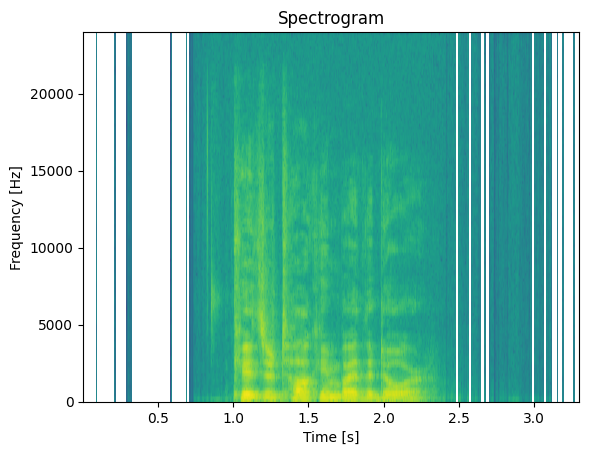

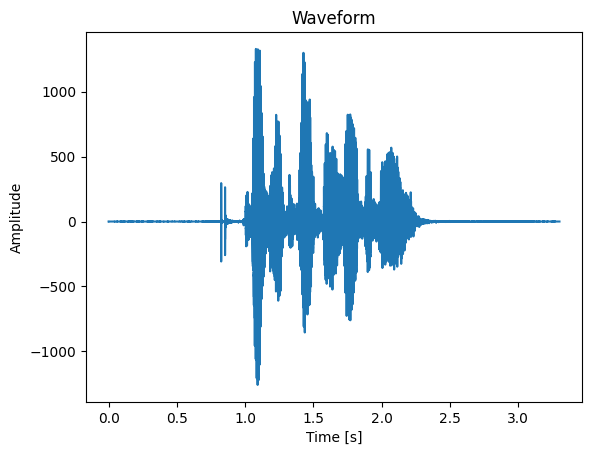

In [5]:

filename = ravdess_dataframe.path[0]

# Plot spectogram
Fs, aud = wavfile.read(filename)
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs)
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.show()

#Plot waveform
duration = len(aud)/Fs
time = np.arange(0,duration,1/Fs) #time vector
plt.plot(time,aud)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Waveform")
plt.show()

# Loop files

27334


C:\Users\Julia\AppData\Local\Temp\ipykernel_18688\1947961337.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  Fs, aud = wavfile.read(filename)


ValueError: x and y must have same first dimension, but have shapes (158558,) and (1, 143)

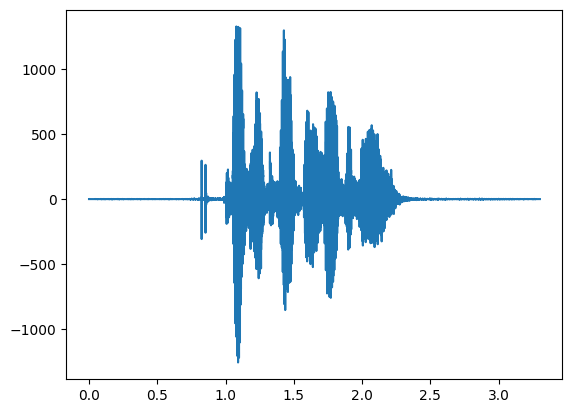

In [37]:
# for index, file in ravdess_dataframe.iterrows():
    # Load the file 
    # Librosa.load returns audio times series (np array) and sampling rate of audio
    #audio, samplingRate = librosa.load(file['path'])

    # remove noise

    # zero crossing rate

audio, samplingRate = librosa.load(filename)

zero_crossings = zeroCrossingRate(audio, samplingRate)
print(sum(zero_crossings))

rmse = RMSE(audio, samplingRate, filename)
print(rmse[0]) 

# Trim Audio


# Remove noise


# Feature extraction

### Zero crossing rate

In [15]:
def zeroCrossingRate(audio, samplingRate):
    zero_crossings = librosa.zero_crossings(audio, pad=False)
    return zero_crossings
    
    

### Root mean square energy

In [36]:
def RMSE(audio, samplingRate, filename):

    rmse = librosa.feature.rms(y=audio)

    Fs, aud = wavfile.read(filename)
    duration = len(aud)/Fs
    time = np.arange(0,duration,1/Fs) #time vector
    plt.plot(time,aud)
    plt.plot(time, rmse, color='r')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title("Waveform")
    plt.show()

    return rmse


# oklart blir en hel lista, hur få ut ett värde?

### Spectral centroid

### Mel frequency cepstrum coefficients

### Pitch and chroma features

# Creating training and testing data

# Classification yippi